# **Hotel Reservations Dataset**


| Column Name                           | Description                                                                                      |
|---------------------------------------|--------------------------------------------------------------------------------------------------|
| Booking_ID                            | Unique identifier of each booking                                                                |
| no_of_adults                          | Number of adults                                                                                 |
| no_of_children                        | Number of Children                                                                               |
| no_of_weekend_nights                  | Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel  |
| no_of_week_nights                     | Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel      |
| type_of_meal_plan                     | Type of meal plan booked by the customer                                                         |
| required_car_parking_space            | Does the customer require a car parking space? (0 - No, 1- Yes)                                   |
| room_type_reserved                    | Type of room reserved by the customer                                                             |
| lead_time                             | Number of days between the date of booking and the arrival date                                   |
| arrival_year                          | Year of arrival date                                                                             |
| arrival_month                         | Month of arrival date                                                                            |
| arrival_date                          | Date of the month                                                                                |
| market_segment_type                   | Market segment designation                                                                       |
| repeated_guest                        | Is the customer a repeated guest? (0 - No, 1- Yes)                                               |
| no_of_previous_cancellations          | Number of previous bookings that were canceled by the customer prior to the current booking     |
| no_of_previous_bookings_not_canceled  | Number of previous bookings not canceled by the customer prior to the current booking           |
| avg_price_per_room                    | Average price per day of the reservation; prices of the rooms are dynamic (in euros)            |
| no_of_special_requests                | Total number of special requests made by the customer                                            |
| booking_status                        | Flag indicating if the booking was canceled or not                                               |


In [2]:
#Importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import seaborn as sns

In [3]:
#uploating the dataset
df = pd.read_csv("/content/drive/MyDrive/DS_for_business/project/Hotel Reservations.csv")
# display of first three rows  in the dataframe
df.head(3)

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled


## **Understanding the dataset**

In [4]:
#using shape to know the size of the dataset
df.shape

(36275, 19)

In [5]:
#Data types of columns in the dataset
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

In [6]:
#df.info() provides a summary of the dataset's suck as the rangeIndex, data columns, Dtype, and the count of non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
#df.describe() provides statistics such as the mean, minimum, standard deviation, and more.
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [8]:
#Checking for missing data in the dataset
df.isnull().sum()


Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [9]:
#The sum count of the duplicated values
df.duplicated().sum()

0

##**Exploratory Data Analysis**

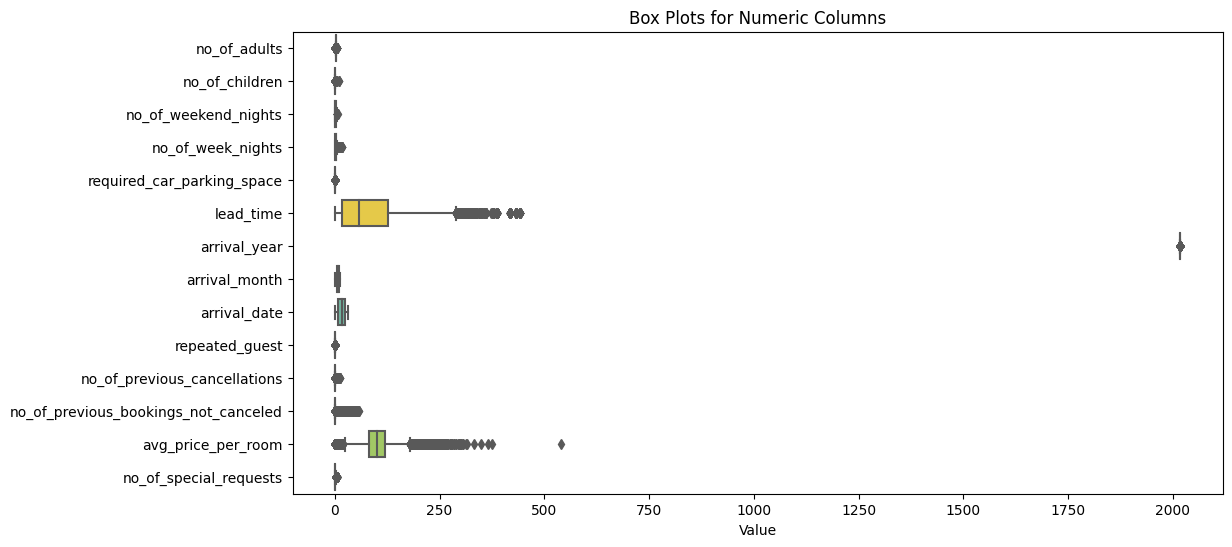

In [10]:
# numeric columns for the box plot
numeric_columns = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

# box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_columns], orient="h", palette="Set2")
plt.title("Box Plots for Numeric Columns")
plt.xlabel("Value")
plt.show()


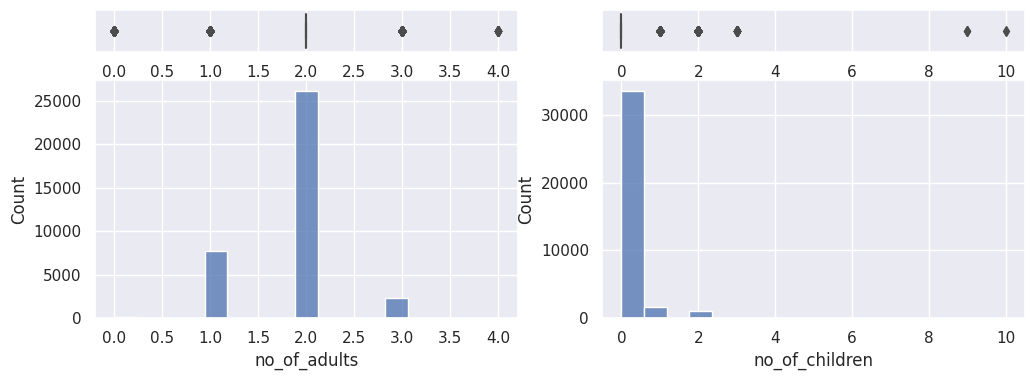

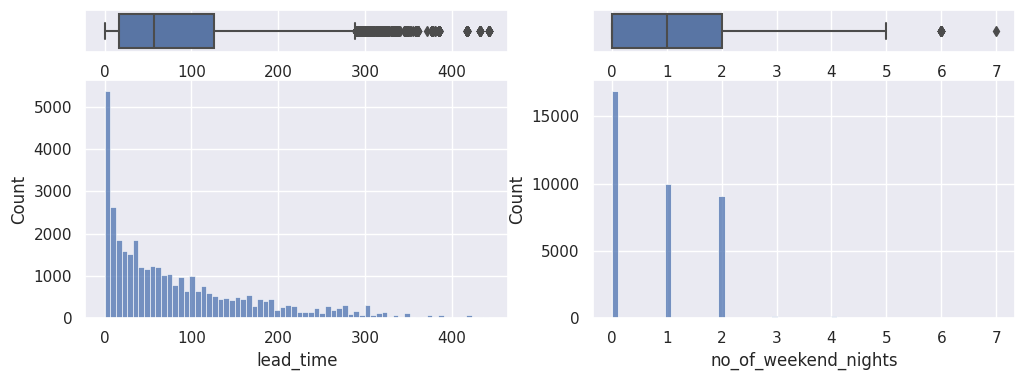

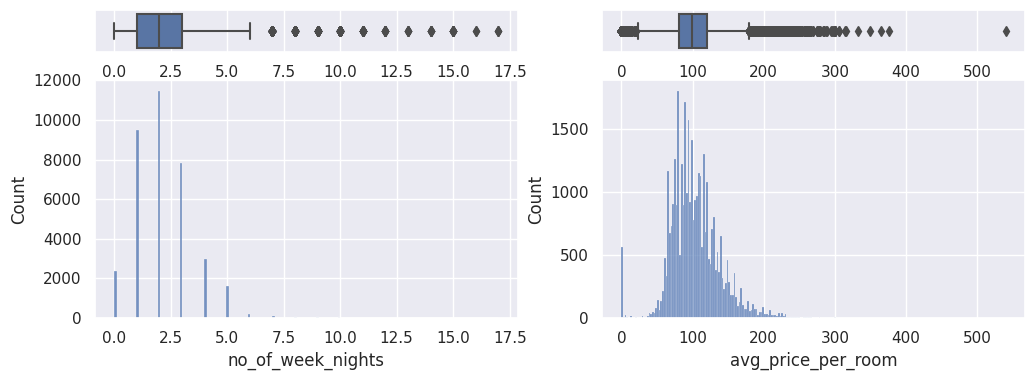

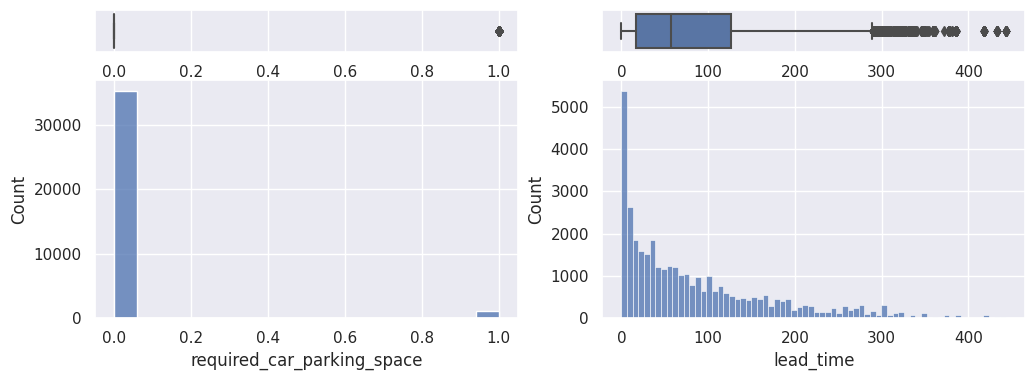

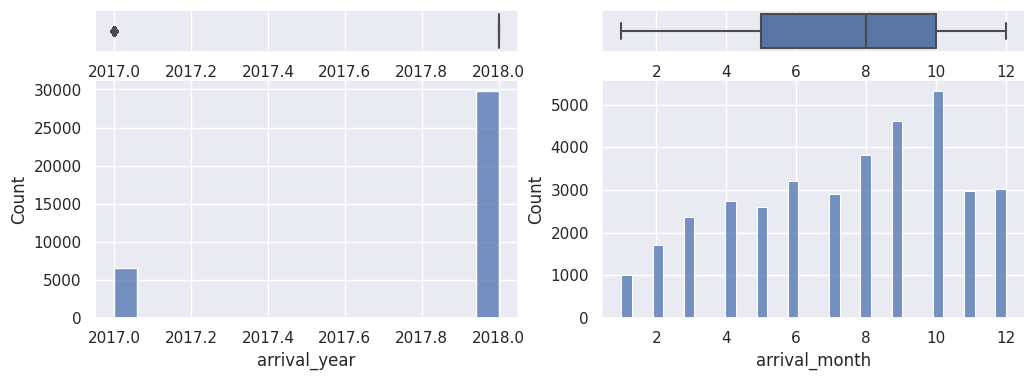

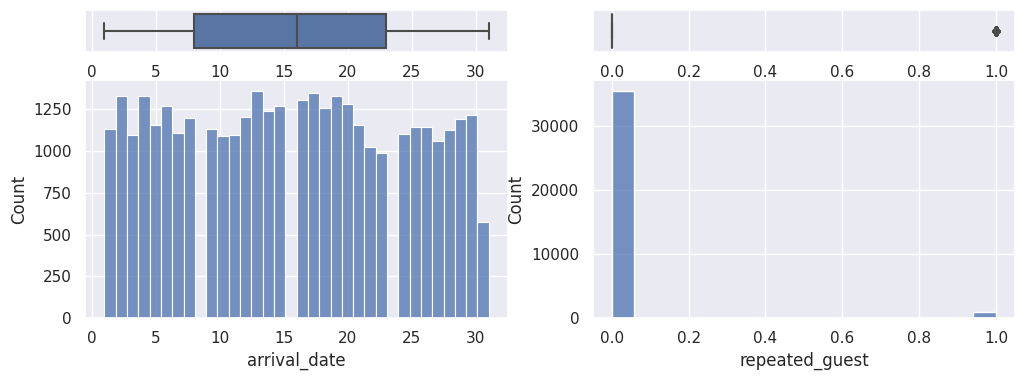

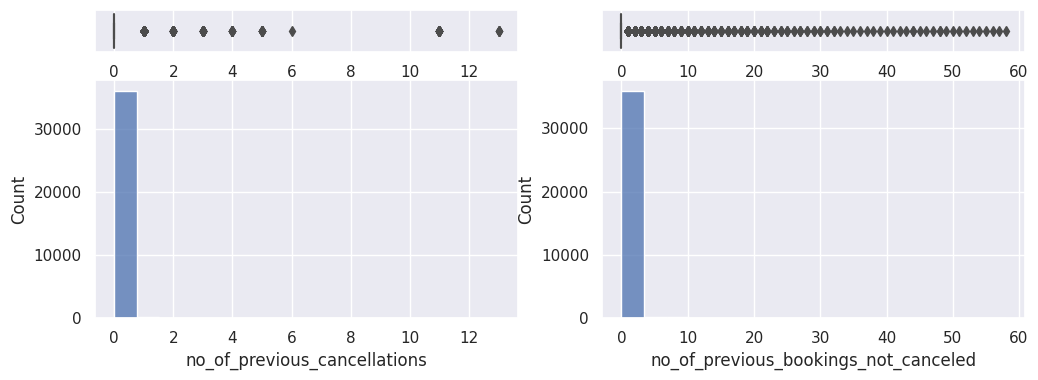

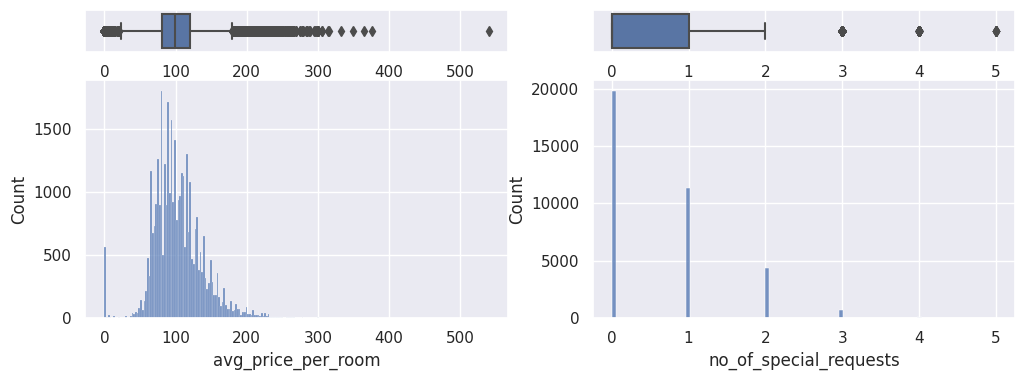

In [11]:
def print_box_hist(data, data1, data2):
    sns.set(style="darkgrid")
    f, axes = plt.subplots(2, 2, figsize=(12, 4), gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(data, x=data1, orient="h", ax=axes[0, 0])
    sns.histplot(data, x=data1, ax=axes[1, 0])

    sns.boxplot(data, x=data2, orient="h", ax=axes[0, 1])
    sns.histplot(data, x=data2, ax=axes[1, 1])

    axes[0, 0].set(xlabel='')
    axes[0, 1].set(xlabel='')

    plt.show()

print_box_hist(df, 'no_of_adults', 'no_of_children')
print_box_hist(df, 'lead_time', 'no_of_weekend_nights')
print_box_hist(df, 'no_of_week_nights', 'avg_price_per_room')
print_box_hist(df, 'required_car_parking_space', 'lead_time')
print_box_hist(df, 'arrival_year', 'arrival_month')
print_box_hist(df, 'arrival_date', 'repeated_guest')
print_box_hist(df, 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled')
print_box_hist(df, 'avg_price_per_room', 'no_of_special_requests')

In [12]:
#Get a list of numeric column names in a DataFrame.
def numeric_cols(data):
    num_cols = []
    for col in data.columns:
        if data[col].dtype == 'int64' or data[col].dtype == 'float64':
            num_cols.append(col)
    return num_cols
numeric_columns = numeric_cols(df)
print(numeric_columns)


['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']


In [13]:
#Get a list of categorical column names in a DataFrame.
def category_columns(data):
  cat_cols = []
  for i in data:
    if data[i].dtype == 'object' or data[i].dtype == 'category':
      cat_cols.append(i)
  return cat_cols
categorical_columns = category_columns(df)
print(categorical_columns)


['Booking_ID', 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']


In [14]:
# removing the outluers from dataset
def remove_outliers(data, columns, lower_bound = 0.25, upper_bound = 0.75):
    masks = []
    for column in columns:
        q1 = data[column].quantile(lower_bound)
        q3 = data[column].quantile(upper_bound)
        iqr = q3 - q1

        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        mask = (data[column] >= lower) & (data[column] <= upper)
        masks.append(mask)

    # Combine the masks
    final_mask = np.all(masks, axis=0)
    # Remove outliers
    final_dataset = data[final_mask]

    return final_dataset

#removing outlers
columns=["no_of_children","lead_time","no_of_week_nights","avg_price_per_room","lead_time", "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled","avg_price_per_room", "no_of_special_requests"]
removeOutliers= remove_outliers(df,columns)

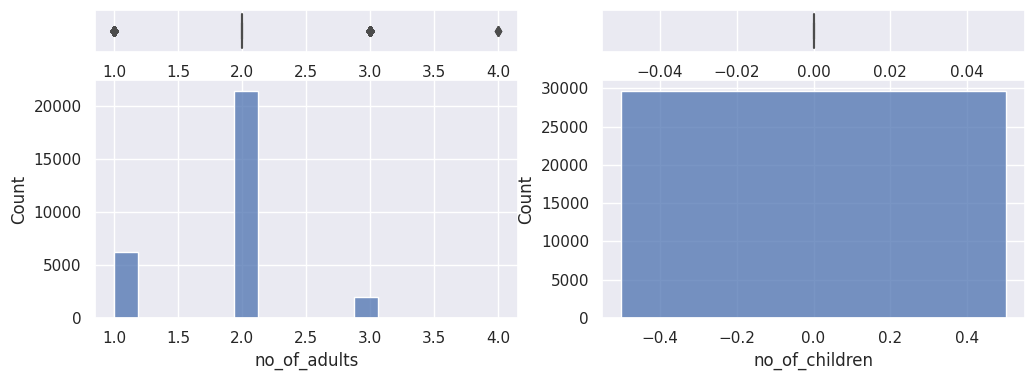

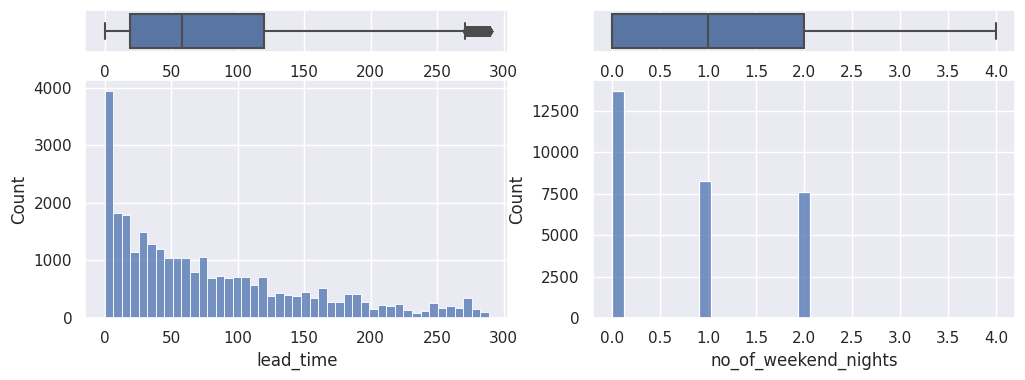

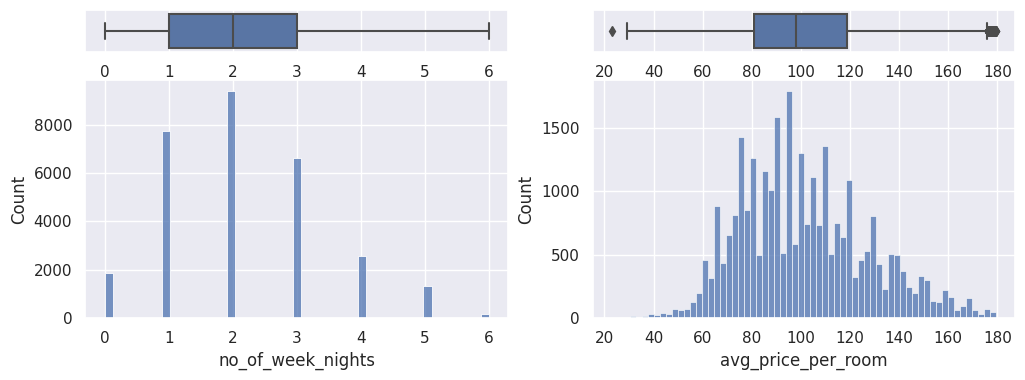

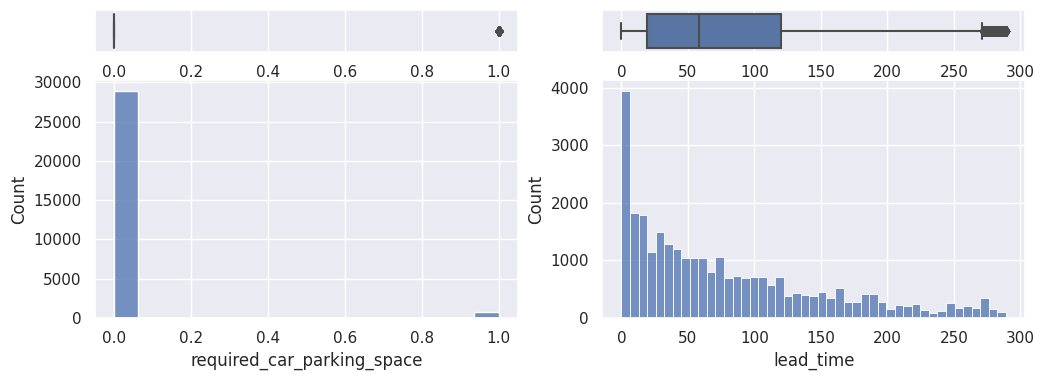

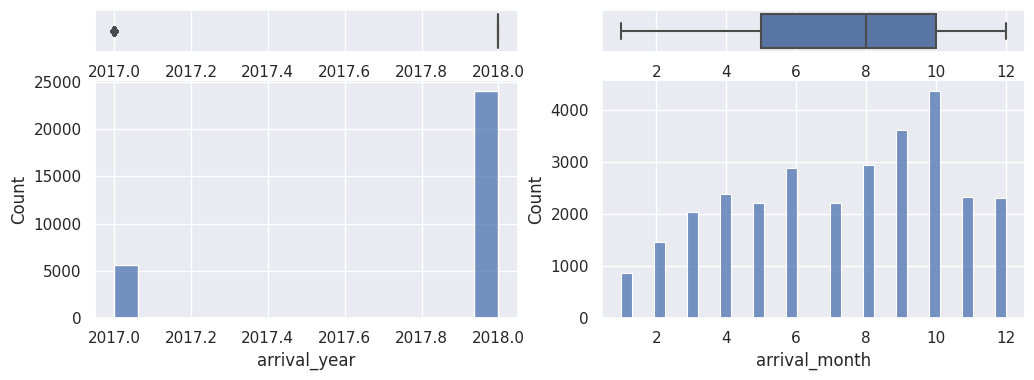

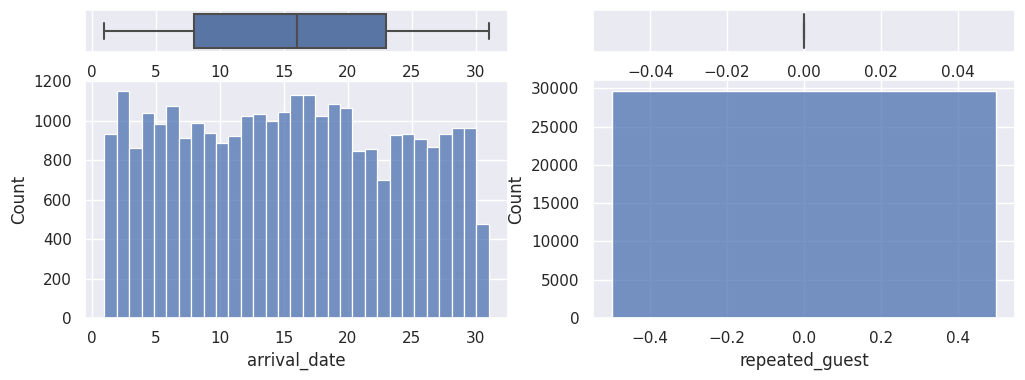

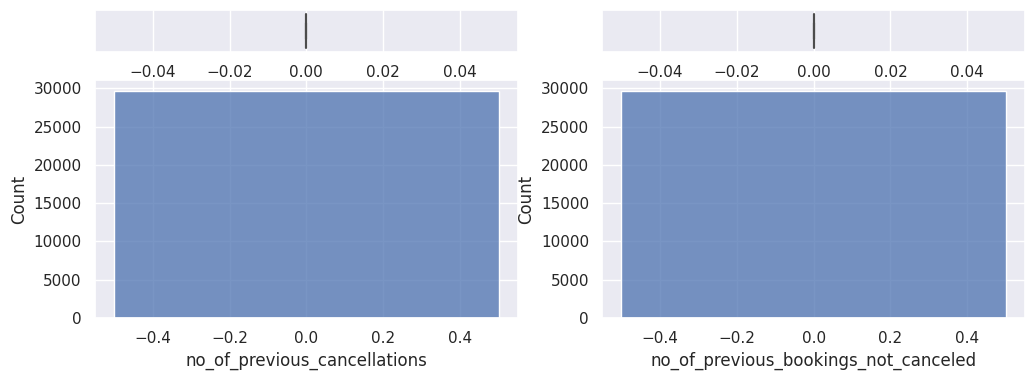

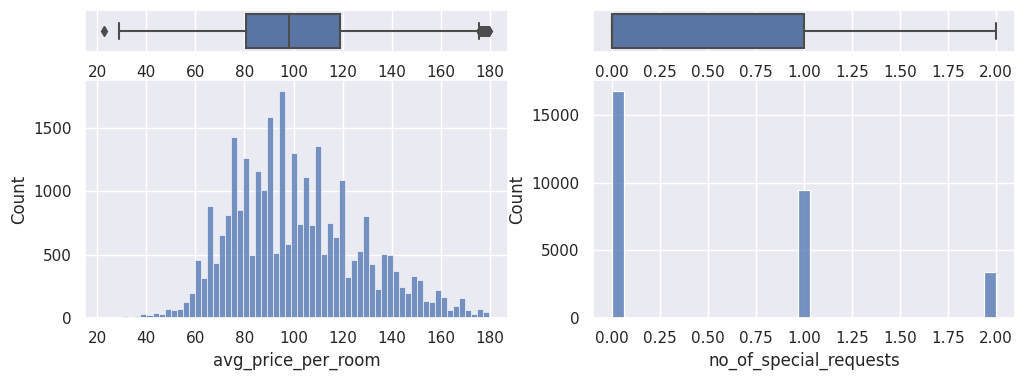

In [15]:
print_box_hist(removeOutliers, 'no_of_adults', 'no_of_children')
print_box_hist(removeOutliers, 'lead_time', 'no_of_weekend_nights')
print_box_hist(removeOutliers, 'no_of_week_nights', 'avg_price_per_room')
print_box_hist(removeOutliers, 'required_car_parking_space', 'lead_time')
print_box_hist(removeOutliers, 'arrival_year', 'arrival_month')
print_box_hist(removeOutliers, 'arrival_date', 'repeated_guest')
print_box_hist(removeOutliers, 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled')
print_box_hist(removeOutliers, 'avg_price_per_room', 'no_of_special_requests')

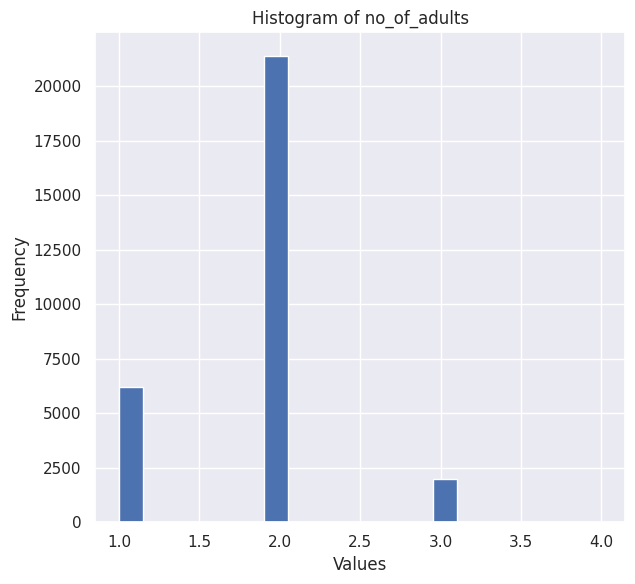

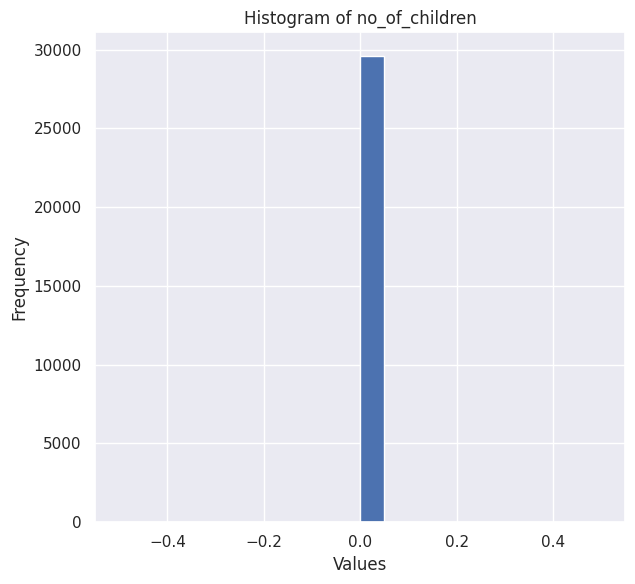

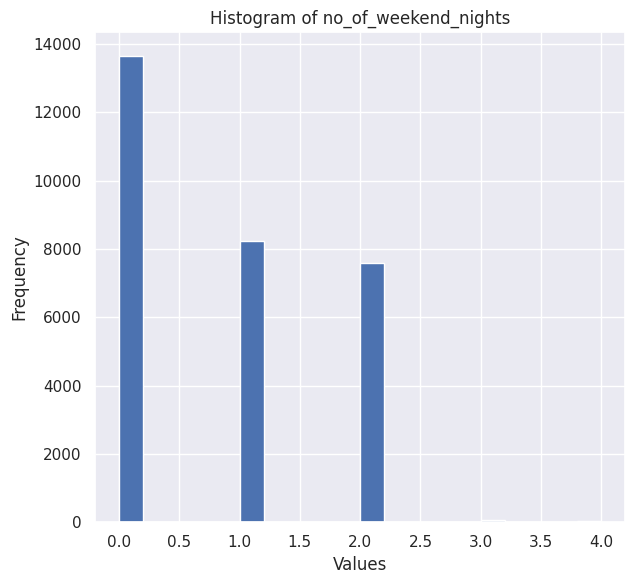

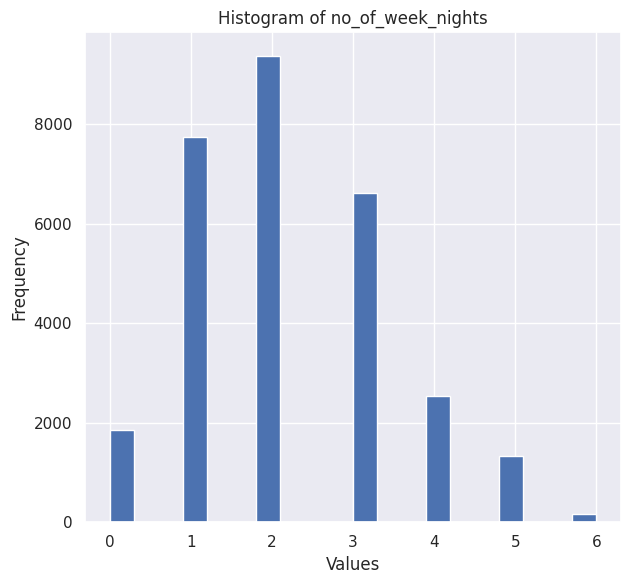

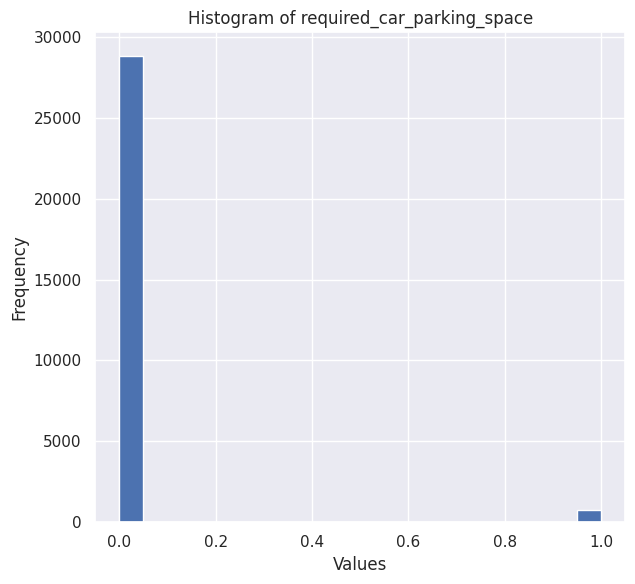

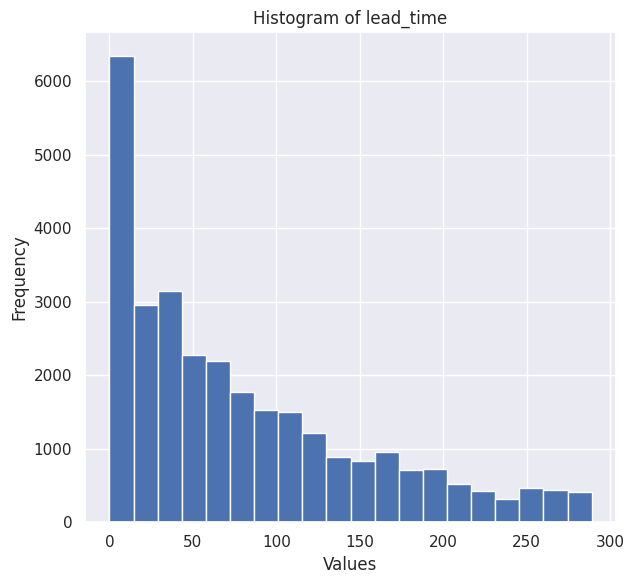

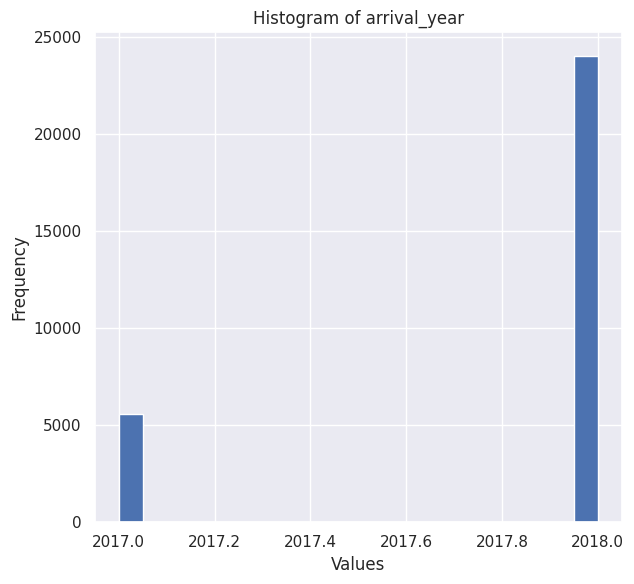

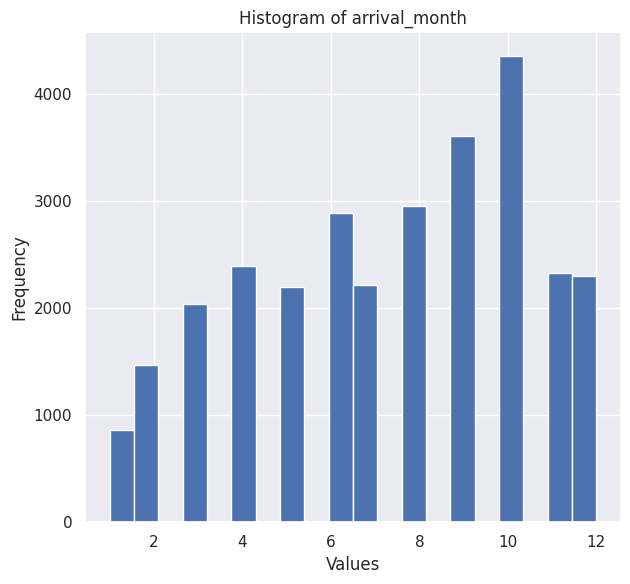

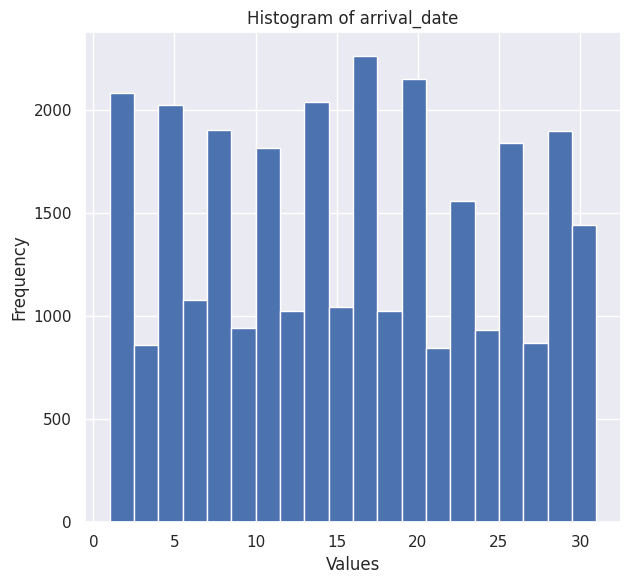

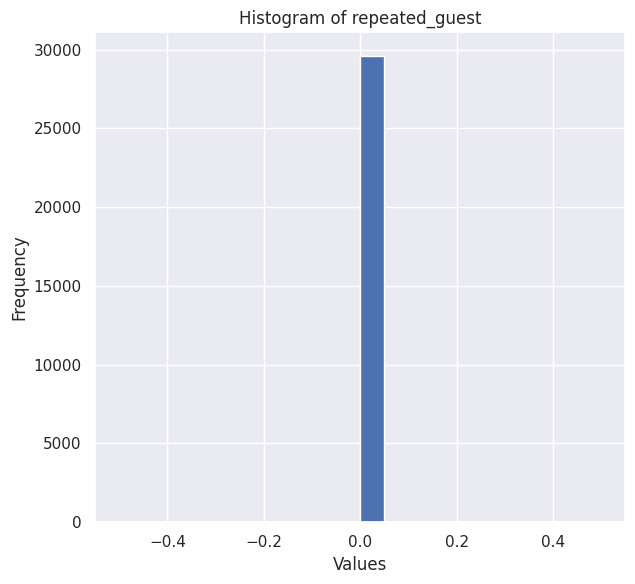

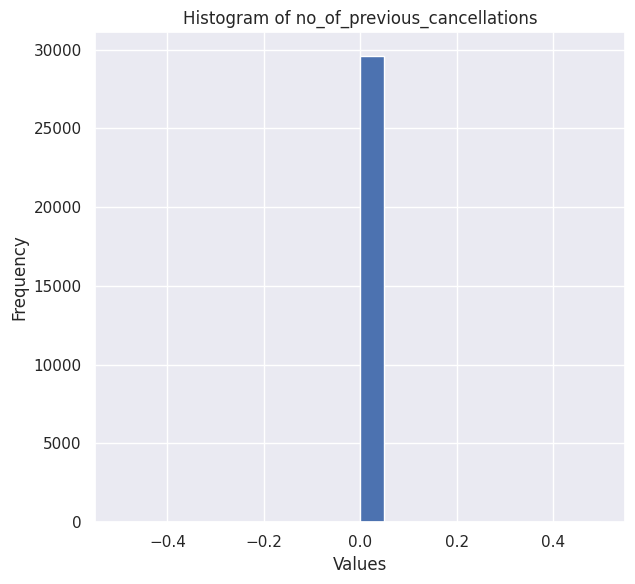

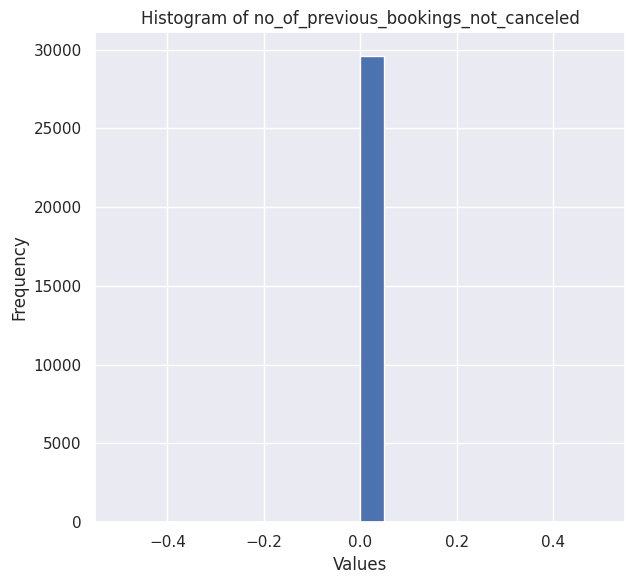

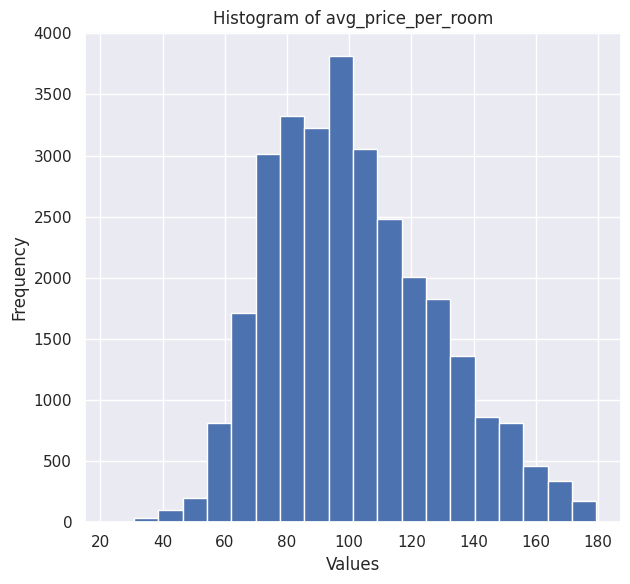

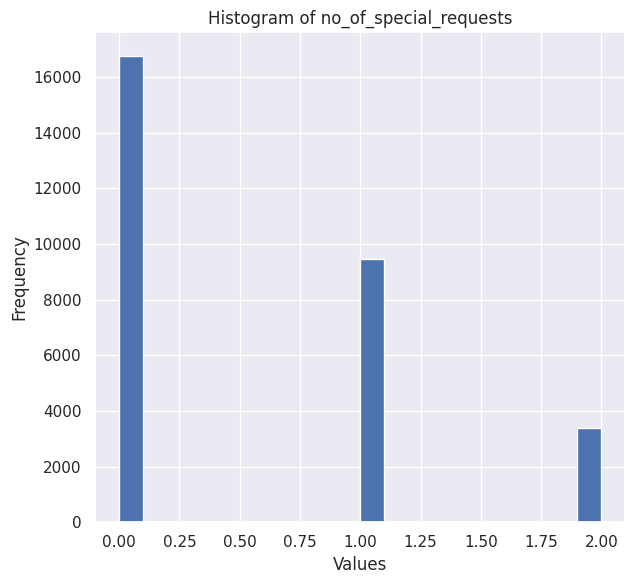

In [16]:
#some Histograms for the numerical clumns
for col in numeric_cols(removeOutliers):
    plt.figure(figsize=(12, 6))
    # Histogram
    plt.subplot(1, 2, 2)
    plt.hist(removeOutliers[col], bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [17]:
categorical_columns= removeOutliers[[ 'type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']]
categorical_columns

,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
0,Meal Plan 1,Room_Type 1,Offline,Not_Canceled
1,Not Selected,Room_Type 1,Online,Not_Canceled
2,Meal Plan 1,Room_Type 1,Online,Canceled
3,Meal Plan 1,Room_Type 1,Online,Canceled
4,Not Selected,Room_Type 1,Online,Canceled
...,...,...,...,...
36270,Meal Plan 1,Room_Type 4,Online,Not_Canceled
36271,Meal Plan 1,Room_Type 1,Online,Canceled
36272,Meal Plan 1,Room_Type 1,Online,Not_Canceled
36273,Not Selected,Room_Type 1,Online,Canceled


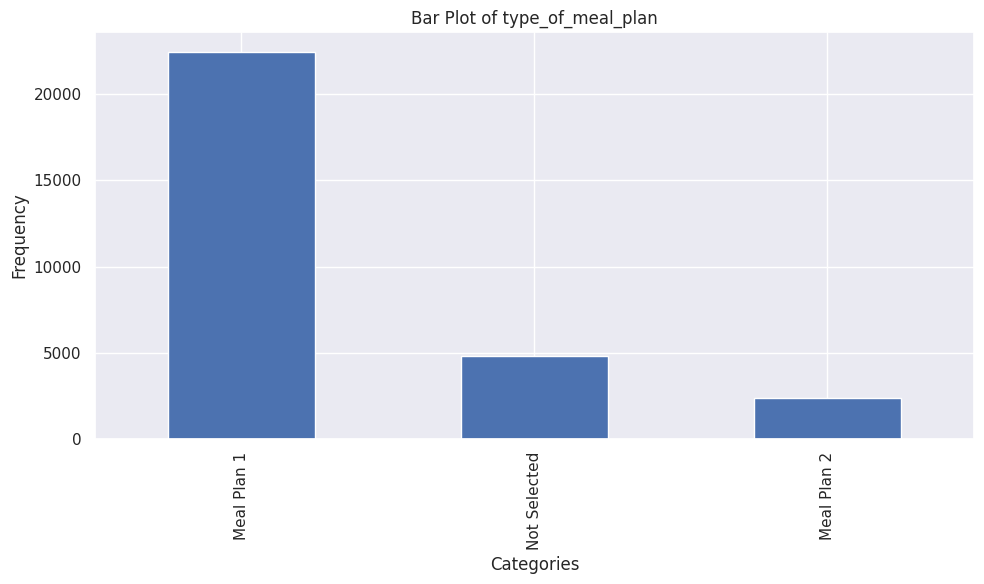

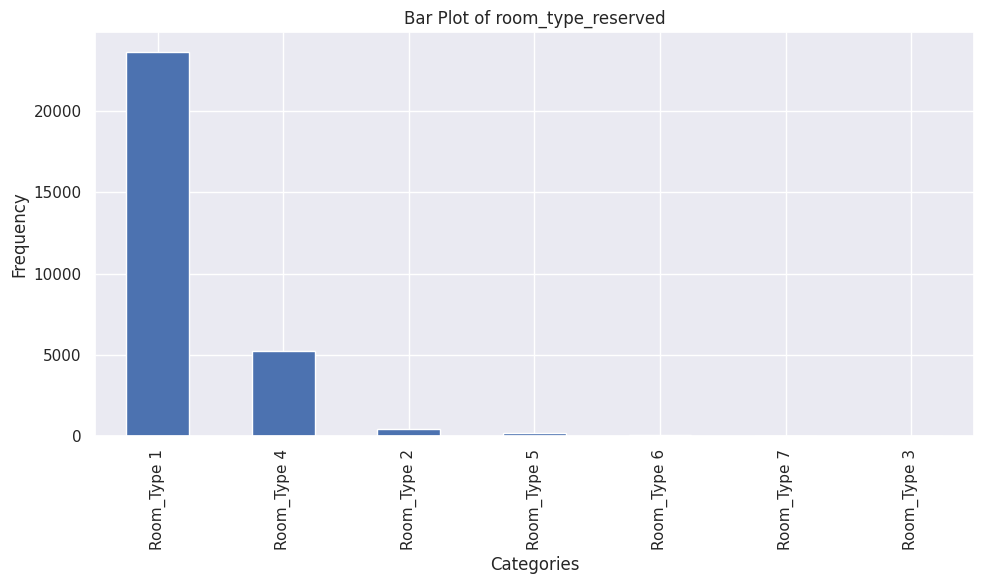

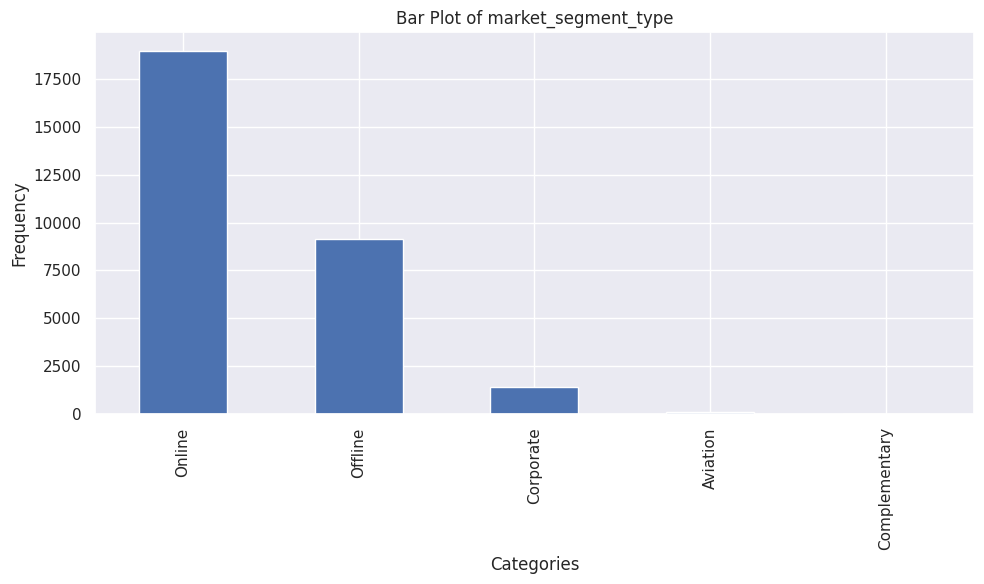

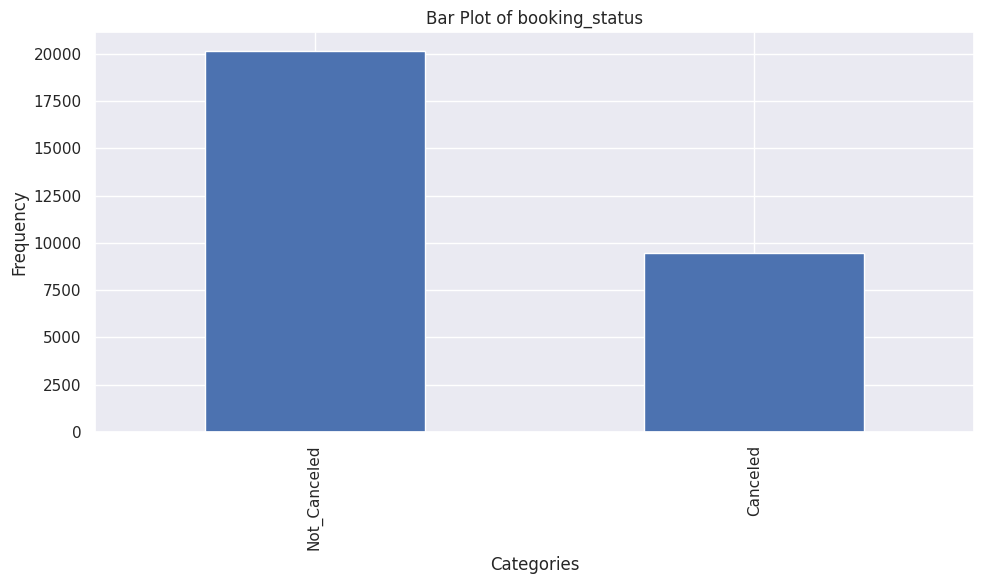

In [18]:
# Create bar plots for all categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))

    # Bar plot
    value_counts = removeOutliers[col].value_counts()
    value_counts.plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel('Categories')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

<Figure size 1000x600 with 0 Axes>

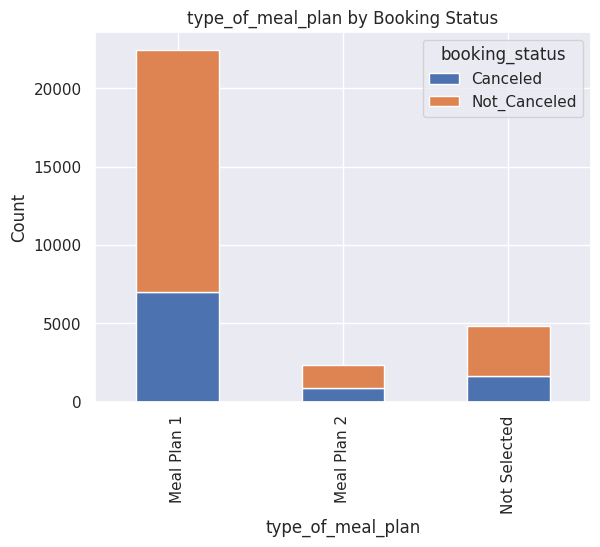

<Figure size 1000x600 with 0 Axes>

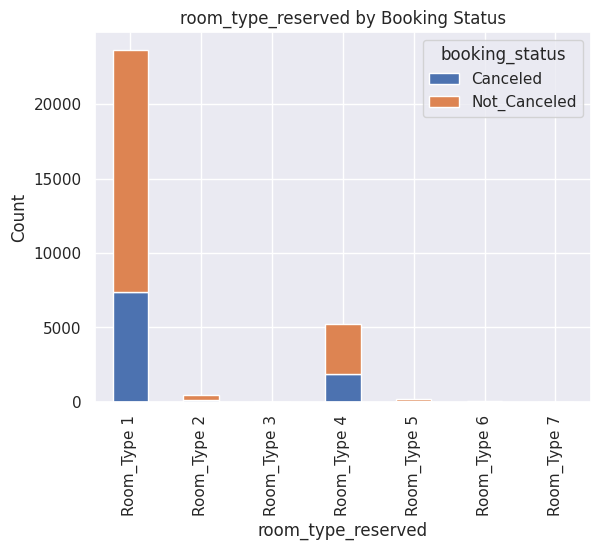

<Figure size 1000x600 with 0 Axes>

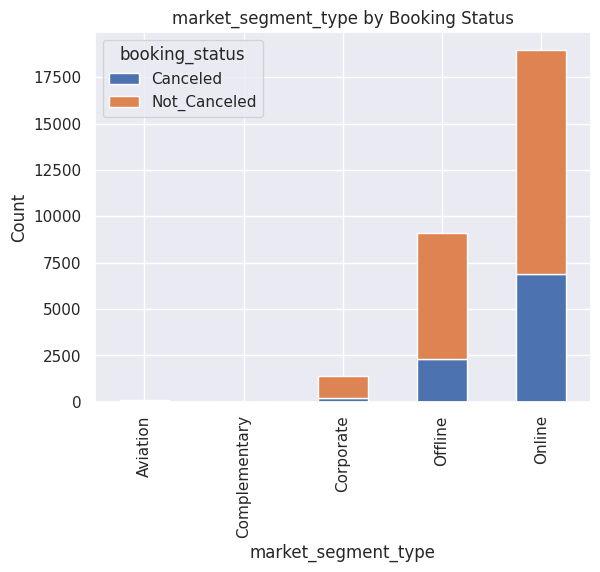

<Figure size 1000x600 with 0 Axes>

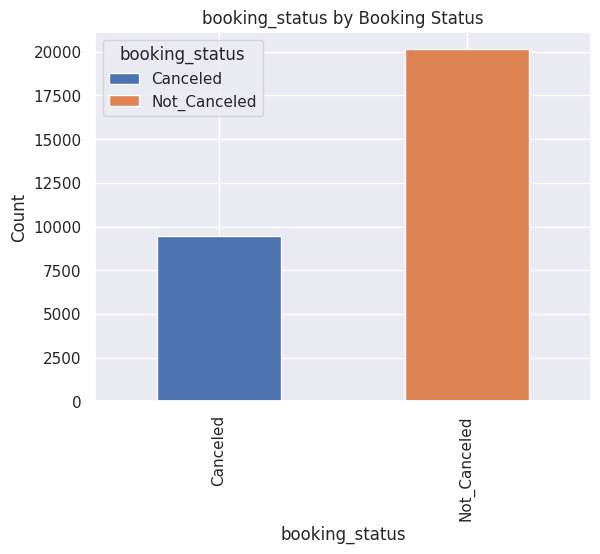

In [20]:
# Create stacked bar charts
for col in categorical_columns:
  plt.figure(figsize=(10, 6))

  # plot
  cross_tab = pd.crosstab(index=removeOutliers[col], columns=removeOutliers['booking_status'])
  cross_tab.plot(kind='bar', stacked=True)
  plt.title(f"{col} by Booking Status")
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()